On tente de maximiser :
$$f:x\in[-1;1]\to-(x^2(2+sin(10x))^2)\in\mathbb{R}$$

Le maximum de la fonction est 0, voici une représentation graphique entre $[-1;1]$ :

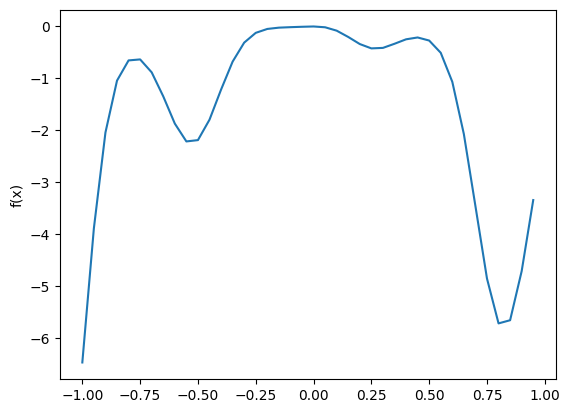

In [110]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return -(x*x*(2+np.sin(10*x))**2)

plt.plot(np.arange(-1, 1, 0.05), [f(x) for x in np.arange(-1, 1, 0.05)])
plt.ylabel('f(x)')
plt.show()

Implantation de l’algorithme génétique sous la forme d’une fonction (approx. : moyenne th. ∼ moyenne
empirique)

In [111]:
import random

def genetic_algo(prec, Npop, pM, pm, ps, em):
    if pM + pm + ps >= 1:
        raise Exception('Invalid probabilities')

    count = 1

    pop = np.random.uniform(-1, 1, Npop)
    pop = sorted(pop, key=lambda x: f(x))

    bestPop = pop[-1]
    err = abs(f(bestPop))

    while err > prec:
        # grande mutation
        if pM > 0:
            pop[:int(Npop*pM)] = np.random.uniform(-1, 1, int(Npop*pM))

        # petite mutation
        if pm > 0:
            Uem = np.random.uniform(-em, em, int(Npop*pM))
            pop[int(Npop*pM):int(Npop*(pM + pm))] = [bestPop + Uem[i] for i in range(int(Npop*pM))]
        

        #crossover
        if ps > 0:
            pop[int(Npop*(pM + pm)):int(Npop*(pM + pm + ps))] = [(bestPop + pop[i])/2 for i in range(int(Npop*(pM + pm)), int(Npop*(pM + pm + ps)))]

        pop = sorted(pop, key=lambda x: f(x))
        bestPop = pop[-1]
        err = abs(f(bestPop))
        count += 1
    
    return (bestPop, count)

Implantation de la fonction qui réalise la moyenne de la vitesse et la recherche du meilleur abscisse :

In [112]:
def results(N, prec, Npop, pM, pm, ps, em):
    bestPops = []
    counts = []

    for n in range(N):
        result = genetic_algo(prec, Npop, pM, pm, ps, em)
        bestPops.append(result[0])
        counts.append(result[1])

    return (sorted(bestPops, key= lambda x: f(x))[-1], np.mean(counts))


infos = results(1000, 10e-3, 10, .8, 0, 0, 0)
print("x max = ", infos[0])
print("moyenne itérations = ", infos[1])

x max =  0.00015725375575059708
moyenne itérations =  2.392


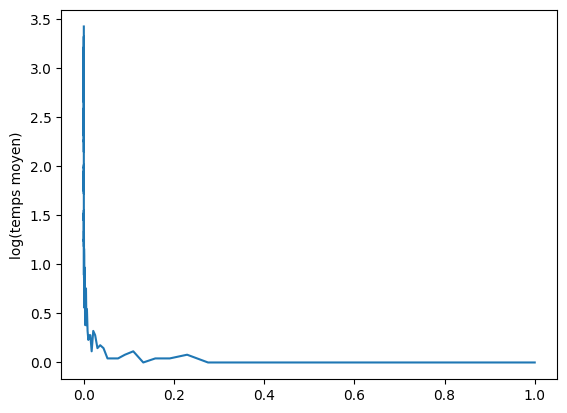

In [113]:
M = 100
x = [pow(10, -8*i/M) for i in range(M)]
y = []
for prec in x:
    y.append(results(10, prec, 10, .8, 0, 0, 0)[1])

plt.plot(x, np.log10(y))
plt.ylabel('log(temps moyen)')
plt.show()

In [114]:
print("pm = 0,15, em = 0.05 => results = ", results(100, 10e-8, 10, .8, .15, 0, .05))
print("pm = 0,1, em = 0.05 => results = ", results(100, 10e-8, 10, .8, .1, 0, .05))
print("pm = 0,1, em = 0.01 => results = ", results(100, 10e-8, 10, .8, .1, 0, .01))
print("pm = 0,1, em = 0.001 => results = ", results(100, 10e-8, 10, .8, .1, 0, .001))
print("pm = 0,05, em = 0.05 => results = ", results(100, 10e-8, 10, .8, .05, 0, .05))
print("pm = 0,05, em = 0.005 => results = ", results(100, 10e-8, 10, .8, .05, 0, .005))
print("pm = 0,05, em = 0.0005 => results = ", results(100, 10e-8, 10, .8, .05, 0, .0005))

pm = 0,15, em = 0.05 => results =  (1.6074669825158483e-06, 37.06)
pm = 0,1, em = 0.05 => results =  (1.5685342090940302e-06, 43.13)
pm = 0,1, em = 0.01 => results =  (-2.2899775469070738e-06, 12.14)
pm = 0,1, em = 0.001 => results =  (6.162362471131763e-07, 16.56)
pm = 0,05, em = 0.05 => results =  (-2.7576919973126834e-06, 47.03)
pm = 0,05, em = 0.005 => results =  (4.229364836260286e-06, 10.57)
pm = 0,05, em = 0.0005 => results =  (-1.2523542374632364e-07, 22.13)


In [115]:
M = 100
x = [10, 100, 1000, 10000, 100000]
y = []
for n in x:
    print(f"Npop = {n} => moyenne itérations = ", results(10, 10e-8, n, .3, .3, .3, .01)[1])

Npop = 10 => moyenne itérations =  7.6
Npop = 100 => moyenne itérations =  3.1
Npop = 1000 => moyenne itérations =  2.0
Npop = 10000 => moyenne itérations =  1.0
Npop = 100000 => moyenne itérations =  1.0


La taille de la population à une influence importante sur la vitesse d'obtention du résultat, même si les performances n'évoluent plus beaucoup entre Npop = 1000 et Npop = 100000.